### **Figure 2: _Pulling forces promote keratin expression within the EVL_ Notebook**

This notebook provides tools and data to recreate the figure 2 from Naik et al 2026. 
It has been modified code from the original [repo](https://github.com/Suyash-Naik/PaperPythonScripting) to allow for all orginal source data retrival from the repository and plotting using standarized versions of the code to plot the figures. 

**Author**: Suyash Naik

In [1]:
from src.BinnedPlotter import BinnedIntensityPlotter

from src.Figureplot import setup_figure, intensity_data_sorting,build_nd_raw_dataset,plot_nd_surface
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import re 

Figureplot.py run on  20260216


**Figure Panel C:** _Keratin Expression upon force perturbation_

Plot of average keratin intensity as a function of time (hpf) in Tg(krt18:KrtGFP) 

control (green, N = 3, n = 5 embryos), CAMypt (blue, N = 3, n = 5 embryos) and

CARhoA mRNA injected embryos (pink, N = 3, n = 4 embryos) as described in (B). 

Error bars as ribbons SEM plotted along mean.

In [ ]:
intensityfolder="data/Fig2/1C/"
intensityfiles=glob(intensityfolder+"/*/*.csv")

outputfolder="Figure/Figure2/PanelC/"
os.makedirs(outputfolder,exist_ok=True)
print(f"Panel C has {len(intensityfiles)} intensity files for mypt and caRhoA samples. Outputs stored in {outputfolder}")

In [ ]:
plotter = BinnedIntensityPlotter(intensity_files=intensityfiles,
                                 bin_edges=np.arange(4,12.7,0.25),
                                 save_folder=outputfolder,
                                timeframe={
                                    "06092023": 900.53,
                                    "04042023": 878.0,
                                    "30102023": 746.67,
                                    "15022023": 747.19,
                                    "24062020": 880.02,
                                    "04062022": 884.95
                                })
binnedIntensity=plotter.process_data(plotparam="Mean")
plotter.plot_data(colors="figure2C")

### **FIgure 2H** _Aspiration keratin intensity_

Box plot of keratin intensity within the EVL before (green) and after (orange) aspiration either within the pipette (right box in schematic) or outside of it (left box in schematic) in Tg(actb2:Utrophinmcherry,krt18:Krt18GFP) embryos at 5 and 7hpf. 

Boxes represent quartiles for the data, dots overlaid for datasets (pvalues: ***<0.001 Wilocoxon test). 

In [8]:
folder2H="data/Fig2/2H/*"
outputfolder2H="Figure/Figure2/PanelH/"
cytofolder3="data/Fig2/2H/CytoD_08072025"
cytofolder1="data/Fig2/2H/CytoD_05072025"
cytofolder2="data/Fig2/2H/CytoD_01072025"
os.makedirs(outputfolder2H,exist_ok=True)
earlyfiles=['15112021_Pos002','15112021_Pos004','15112021_Pos006','15112021_Pos008',
            '15112021_Pos010','15112021_Pos012','15112021_Pos014','15112021_Pos016',
            '15112021_Pos018','26112021_Pos010', '26112021_Pos012', '26112021_Pos014',
            '26112021_Pos016', '26112021_Pos018', 
            '26112021_Pos022', '26112021_Pos024', '26112021_Pos026']
lateindexcyto=["08072025_Pos12","05072025_Pos002","05072025_Pos004"]
earlyindexcyto=["01072025_Pos001","01072025_Pos002","01072025_Pos003","01072025_Pos004","05072025_Pos006","05072025_Pos007","08072025_Pos003","08072025_Pos004","08072025_Pos005","08072025_Pos010","08072025_Pos011"]

aspirationfolders=glob(folder2H)
cdata,earlyindex= intensity_data_sorting(aspirationfolders, earlyfiles)
c_early_data=cdata[1:, earlyindex].T
lateindex = np.invert(np.isin(np.arange(cdata.shape[1]), earlyindex))
cytodata,earlyindexcyto=intensity_data_sorting([cytofolder3,cytofolder1,cytofolder2],earlyfiles=earlyindexcyto)
late_data = cdata[1:, lateindex].T
early_data = cdata[1:, earlyindex].T
# Get the data subsets for lateindex and earlyindex
lateindex = np.invert(np.isin(np.arange(cytodata.shape[1]), earlyindexcyto))
lateindexc = np.invert(np.isin(np.arange(cdata.shape[1]), earlyindex))
late_data = cdata[1:, lateindexc].T
early_data = cdata[1:, earlyindex].T
late_datacyto = cytodata[1:, lateindex].T
early_datacyto = cytodata[1:, earlyindexcyto].T

In [ ]:
# Save long-form data with value/type columns
data_frames = [
    pd.DataFrame({"value": early_data.flatten(), "type": "early_control"}),
    pd.DataFrame({"value": late_data.flatten(), "type": "late_control"}),
    pd.DataFrame({"value": early_datacyto.flatten(), "type": "early_cytoD"}),
    pd.DataFrame({"value": late_datacyto.flatten(), "type": "late_cytoD"}),
]
long_df = pd.concat(data_frames, ignore_index=True)
long_df.to_csv(os.path.join(outputfolder2H, "intensity_data_long.csv"), index=False)

TypeError: 'dict' object is not callable

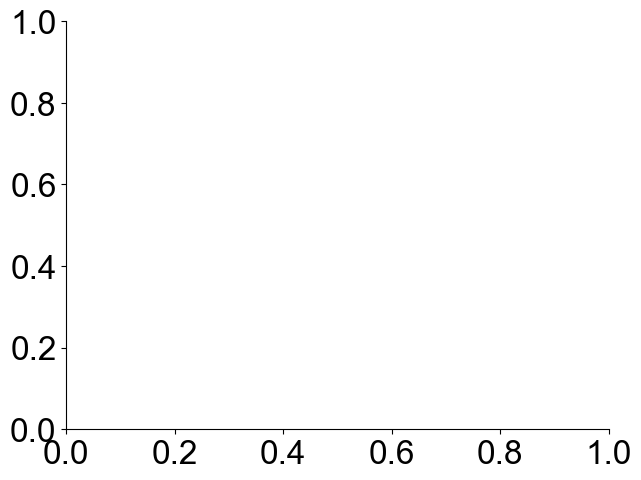

In [9]:
#Plot the box plot of the intensity for early and late embryos in control and cytoD and latB treated embryos
fig,ax=setup_figure()

# Create the x locations for the boxplots
x_locations = np.arange(8)
labels=["",""," ","","",""," ",""]
# Plot the boxplots
bplot=plt.boxplot(early_datacyto, positions=x_locations[2:4],patch_artist=True,tick_labels=labels[:2]
                  ,widths=0.4,showfliers=False,medianprops=dict(color='black', linewidth=2))
x = np.repeat(x_locations[2:4], early_datacyto.shape[0])
x = x + np.random.uniform(-0.02, 0.02, size=x.shape[0])
plt.scatter(x, early_datacyto.T.flatten(), color='black',s=5, alpha=0.5)
cbplot=plt.boxplot(early_data[:,:2],positions=x_locations[:2],patch_artist=True,tick_labels=labels[:2]
                   ,widths=0.4,showfliers=False,medianprops=dict(color='black', linewidth=2))
x = np.repeat(x_locations[:2], early_data[:,:2].shape[0])
x = x + np.random.uniform(-0.02, 0.02, size=x.shape[0])
plt.scatter(x, early_data[:,:2].T.flatten(), color='black', s=5, alpha=0.5)
cbplot2=plt.boxplot(late_data[:,:2], positions=x_locations[4:6],patch_artist=True,tick_labels=labels[4:6]
                    ,widths=0.4, showfliers=False, medianprops=dict(color='black', linewidth=2))
x = np.repeat(x_locations[4:6], late_data[:,:2].shape[0])
x = x + np.random.uniform(-0.02, 0.02, size=x.shape[0])
plt.scatter(x, late_data[:,:2].T.flatten(), color='black', s=5, alpha=0.5)
bplot2=plt.boxplot(late_datacyto, positions=x_locations[6:],patch_artist=True,tick_labels=labels[6:]
                   ,widths=0.4, showfliers=False, medianprops=dict(color='black', linewidth=2))
x = np.repeat(x_locations[6:], late_datacyto.shape[0])
x = x + np.random.uniform(-0.02, 0.02, size=x.shape[0])
plt.scatter(x, late_datacyto.T.flatten(), color='black', s=5, alpha=0.5)
colors=["#83bb03","#0383bb","#83bb03","#0383bb"]
for bp in (bplot,bplot2,cbplot,cbplot2):
    for bplo in bp:
        for patch, color in zip(bp['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.5)
plt.legend([bplot["boxes"][0],bplot["boxes"][1]],[" ","  "],loc="upper left",frameon=False,fontsize=18)
plt.savefig(os.path.join(outputfolder2H,"Figure2_2H_boxplot.png"),bbox_inches='tight',dpi=300,transparent=True)
plt.savefig(os.path.join(outputfolder2H,"Figure2_2H_boxplot.pdf"),bbox_inches='tight',dpi=300,transparent=True)
plt.savefig(os.path.join(outputfolder2H,"Figure2_2H_boxplot.svg"),bbox_inches='tight',dpi=300,transparent=True)
plt.show()